OPM oddball analysis with source localization using beamformer
==============================================================

Lead authors: Hadi Zaatiti hadi.zaatiti@nyu.edu, Osama Abdullah, osama.abdullah@nyu.edu

This notebook is to be run in MATLAB, while having fieldtrip library installed.
It is a pipeline for processing the `oddball` experiment raw data, run frequency analysis in source space, source localization using Beamformer technique.

Importing data and preprocessing
--------------------------------

In [ ]:
We will start with importing the raw data and display the header information.
The .fif file imported here is the one generated from the OPM system.

In [1]:
%% Data initialisation

% Tutorial reference: https://www.fieldtriptoolbox.org/tutorial/eventrelatedaveraging/

cfg                         = [];
cfg.dataset                 = 'C:\Users\hz3752\PycharmProjects\meg-pipeline\pipeline\hadi_code\oddball_experiment_OPM\20240524_122045_sub-amalopm2_file-amalopm2_raw.fif';


data_all = ft_preprocessing(cfg);

% Read the header
hdr = ft_read_header(cfg.dataset);

% Display the header information
disp(hdr);


% The electrode positions for opm can be found in fieldtripdir/template/grad/fieldlinebeta2.mat
% Remind that the positions of the OPM sensor can vary changed on the radial axis of the brain (By pushing OPM sensors in or out)
% So, the sensor layout is changed for every participant according to the axial position of the sensors

 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1930
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_preprocessing.m' at line 392



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 100
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_preprocessing.m' at line 392



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 101
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_preprocessing.m' at line 392



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 214
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_preprocessing.m' at line 392

Opening raw data file C:\Users\hz3752\PycharmProjects\meg-pipeline\pipeline\hadi_code\oddball_experiment_OPM\20240524_122045_sub-amalopm2_file-amalopm2_raw.fif...
	Range : 0 ... 1368099  =      0.000 ...   273.620 secs
Ready.
processing channel { 'L202_bz' 'L302_bz' 'R102_bz' 'L404_bz' 'R103_bz' 'L505_bz' 'L203_bz' 'L606_bz' 'L101_bz' 'L208_bz' 'L204_bz' 'L303_bz' 'R107_bz' 'L405_bz' 'L103_bz' 'L502_bz' 'R104_bz' 'L307_bz' 'R105_bz' 'L403_bz' 'L102_bz' 'L402_bz' 'L104_bz' 'L604_bz' 'R101_bz' 'L304_bz' 'L201_bz' 'L306_bz' 'L205_bz' 'L305_bz' 'di31' 'L105_bz' 'L503_bz' 'R307_bz' 'R205_bz' 'L214_bz' 'R301_bz' 'L111_bz' 'R202_bz' 'L113_bz' 'R402_bz' 'R211_bz' 'R203_bz' 'R408_bz' 'R302_bz' 'R213_bz' 'R206_bz' 'R113_bz' 'R304_bz' 'R210_bz' 'R208_bz' 'R209_bz' 'R2

 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1930



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 100
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 101
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 214
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941

Opening raw data file C:\Users\hz3752\PycharmProjects\meg-pipeline\pipeline\hadi_code\oddball_experiment_OPM\20240524_122045_sub-amalopm2_file-amalopm2_raw.fif...
	Range : 0 ... 1368099  =      0.000 ...   273.620 secs
Ready.


 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_chantype.m' at line 198
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 2837

          label: {109x1 cell}
         nChans: 109
             Fs: 5000
           grad: [1x1 struct]
       nSamples: 1368100
    nSamplesPre: 0
        nTrials: 1
           orig: [1x1 struct]
       chantype: {109x1 cell}
       chanunit: {109x1 cell}



Defining trials
---------------
Remind that in oddball task we had three kind of stimulus, a 500 Hz a high frequency noise, a low frequency 200Hz noise and a white noise.
We will read the triggers from the data and plot them. Channel `di31` is the digital stimulus channel on the OPM, it can take any values 0 to 256.
The current NYUAD lab setup is limited in number of digital pins to 27 and doesn't use the full 36 of the OPM.

 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1930
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_preprocessing.m' at line 392



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 100
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_preprocessing.m' at line 392



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 101
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_preprocessing.m' at line 392



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 214
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_preprocessing.m' at line 392

Opening raw data file C:\Users\hz3752\PycharmProjects\meg-pipeline\pipeline\hadi_code\oddball_experiment_OPM\20240524_122045_sub-amalopm2_file-amalopm2_raw.fif...
	Range : 0 ... 1368099  =      0.000 ...   273.620 secs
Ready.
processing channel { 'di31' }
reading and preprocessing
Reading 0 ... 1368099  =      0.000 ...   273.620 secs... [done]
reading and preprocessing trial 1 from 1
the call to "ft_preprocessing" took 1 seconds


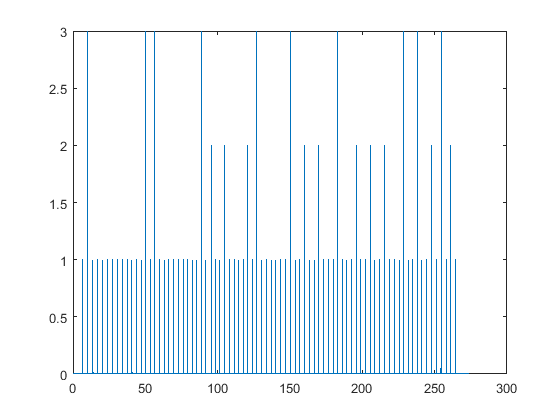

In [3]:
%% Plot the trigger channel

cfg = [];
cfg.dataset = 'C:\Users\hz3752\PycharmProjects\meg-pipeline\pipeline\hadi_code\oddball_experiment_OPM\20240524_122045_sub-amalopm2_file-amalopm2_raw.fif';
cfg.channel = 'di31';
data=ft_preprocessing(cfg);
figure;plot(data.time{1},data.trial{1});

The following plot is then obtained showing the triggers with respect to time.

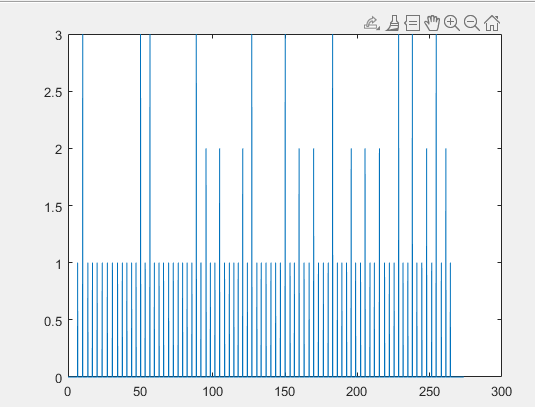

We will now define the trials, which are segments of data whose time is within a range `prestim` and `poststim` around the time when the stimulus is presented.
A `demean` is applied, which substracts the mean values of the data during the baseline window time defined in `baselinewindow`
A `detrend` is applied when a low frequency noise is carrying the signal up or down.
The `lpfilter` is commented but could be used if needed. Remind that any additional filter removes a part of the data, avoid using filters unless justified.

In [4]:
%% Defining Trials

%value = 1 is the 500 Hz audio
%value = 2 is the white noise
%value = 3 is the 200 Hz audio

cfg = [];
cfg.dataset                 = 'C:\Users\hz3752\PycharmProjects\meg-pipeline\pipeline\hadi_code\oddball_experiment_OPM\20240524_122045_sub-amalopm2_file-amalopm2_raw.fif';
cfg.trialfun = 'ft_trialfun_general'; % this is the default
cfg.trialdef.eventtype = 'di31';  % Specify the trigger channel
cfg.trialdef.eventvalue = [1, 2, 3];  % Define the value of the trigger
cfg.demean     = 'yes';
cfg.detrend = 'yes';
cfg.baselinewindow = [-0.2 0];
%cfg.lpfilter   = 'yes';                              % apply lowpass filter
%cfg.lpfreq     = 35;                                 % lowpass at 35 Hz.
cfg.trialdef.prestim        = 0.5; % in seconds
cfg.trialdef.poststim       = 1.2; % in seconds

cfg = ft_definetrial(cfg);

data = ft_preprocessing(cfg);

evaluating trial function 'ft_trialfun_general'
reading the header from 'C:\Users\hz3752\PycharmProjects\meg-pipeline\pipeline\hadi_code\oddball_experiment_OPM\20240524_122045_sub-amalopm2_file-amalopm2_raw.fif'


 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1930
 In 'C:\Users\hz3752\Documents\fieldtrip\trialfun\ft_trialfun_general.m' at line 108
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_definetrial.m' at line 198



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 100
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\trialfun\ft_trialfun_general.m' at line 108
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_definetrial.m' at line 198



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 101
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\trialfun\ft_trialfun_general.m' at line 108
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_definetrial.m' at line 198



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 214
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\trialfun\ft_trialfun_general.m' at line 108
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_definetrial.m' at line 198

Opening raw data file C:\Users\hz3752\PycharmProjects\meg-pipeline\pipeline\hadi_code\oddball_experiment_OPM\20240524_122045_sub-amalopm2_file-amalopm2_raw.fif...
	Range : 0 ... 1368099  =      0.000 ...   273.620 secs
Ready.


 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_chantype.m' at line 198
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 2837
 In 'C:\Users\hz3752\Documents\fieldtrip\trialfun\ft_trialfun_general.m' at line 108
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_definetrial.m' at line 198

reading the events from 'C:\Users\hz3752\PycharmProjects\meg-pipeline\pipeline\hadi_code\oddball_experiment_OPM\20240524_122045_sub-amalopm2_file-amalopm2_raw.fif'


 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1930
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_event.m' at line 1685
 In 'C:\Users\hz3752\Documents\fieldtrip\trialfun\ft_trialfun_general.m' at line 117
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_definetrial.m' at line 198



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 100
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_event.m' at line 1685
 In 'C:\Users\hz3752\Documents\fieldtrip\trialfun\ft_trialfun_general.m' at line 117
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_definetrial.m' at line 198



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 101
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_event.m' at line 1685
 In 'C:\Users\hz3752\Documents\fieldtrip\trialfun\ft_trialfun_general.m' at line 117
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_definetrial.m' at line 198



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 214
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_event.m' at line 1685
 In 'C:\Users\hz3752\Documents\fieldtrip\trialfun\ft_trialfun_general.m' at line 117
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_definetrial.m' at line 198

Opening raw data file C:\Users\hz3752\PycharmProjects\meg-pipeline\pipeline\hadi_code\oddball_experiment_OPM\20240524_122045_sub-amalopm2_file-amalopm2_raw.fif...
	Range : 0 ... 1368099  =      0.000 ...   273.620 secs
Ready.
Reading 0 ... 1368099  =      0.000 ...   273.620 secs... [done]
found 80 events
created 80 trials
the call to "ft_definetrial" took 1 seconds


 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1930
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_preprocessing.m' at line 392



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 100
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_preprocessing.m' at line 392



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 101
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_preprocessing.m' at line 392



 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\private\mne2grad.m' at line 214
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 1941
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_preprocessing.m' at line 392

Opening raw data file C:\Users\hz3752\PycharmProjects\meg-pipeline\pipeline\hadi_code\oddball_experiment_OPM\20240524_122045_sub-amalopm2_file-amalopm2_raw.fif...
	Range : 0 ... 1368099  =      0.000 ...   273.620 secs
Ready.


 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_chantype.m' at line 198
 In 'C:\Users\hz3752\Documents\fieldtrip\fileio\ft_read_header.m' at line 2837
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_preprocessing.m' at line 392

processing channel { 'L202_bz' 'L302_bz' 'R102_bz' 'L404_bz' 'R103_bz' 'L505_bz' 'L203_bz' 'L606_bz' 'L101_bz' 'L208_bz' 'L204_bz' 'L303_bz' 'R107_bz' 'L405_bz' 'L103_bz' 'L502_bz' 'R104_bz' 'L307_bz' 'R105_bz' 'L403_bz' 'L102_bz' 'L402_bz' 'L104_bz' 'L604_bz' 'R101_bz' 'L304_bz' 'L201_bz' 'L306_bz' 'L205_bz' 'L305_bz' 'di31' 'L105_bz' 'L503_bz' 'R307_bz' 'R205_bz' 'L214_bz' 'R301_bz' 'L111_bz' 'R202_bz' 'L113_bz' 'R402_bz' 'R211_bz' 'R203_bz' 'R408_bz' 'R302_bz' 'R213_bz' 'R206_bz' 'R113_bz' 'R304_bz' 'R210_bz' 'R208_bz' 'R209_bz' 'R204_bz' 'R212_bz' 'R305_bz' 'R409_bz' 'R303_bz' 'R308_bz' 'R207_bz' 'R309_bz' 'R201_bz' 'R407_bz' 'R306_bz' 'R311_bz' 'R401_bz' 'R502_bz' 'R504_bz' 'R605_bz' 'R603_bz' 'R503_bz' 'R405_bz' 'R506_bz' 'R507_bz' 'R403_bz' 'R604_bz' 'R11

In [ ]:
Display the trials and visually inspect them.

In [5]:
%% Visualise trials

cfg = ft_databrowser(cfg, data);

 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_checkconfig.m' at line 583
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_databrowser.m' at line 183



 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_checkconfig.m' at line 583
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_databrowser.m' at line 183



 In 'C:\Users\hz3752\Documents\fieldtrip\utilities\ft_checkconfig.m' at line 583
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_databrowser.m' at line 183

the input is raw data with 109 channels and 80 trials


 In 'C:\Users\hz3752\Documents\fieldtrip\ft_redefinetrial.m' at line 268
 In 'C:\Users\hz3752\Documents\fieldtrip\ft_databrowser.m' at line 336

the call to "ft_redefinetrial" took 1 seconds
the input is raw data with 109 channels and 80 trials
detected   0 visual artifacts
the different artifact types correspond to the following colors:
  visual = pink
the different event types correspond to the following colors:
  di31 = black


------------------------------------------------------------------------------------
You can use the following keyboard buttons in the databrowser
1-9                : select artifact type 1-9
shift 1-9          : select previous artifact of type 1-9 (does not work with numpad)
alt 1-9            : select next artifact of type 1-9
arrow-left         : previous trial
arrow-right        : next trial
shift arrow-up     : increase vertical scaling
shift arrow-down   : decrease vertical scaling
shift arrow-left   : increase horizontal scaling
shift arrow-down   : decrease horizontal scaling
t                  : open trial or segment selection dialog
c                  : open channel selection dialog
h                  : open horizontal scaling dialog
v                  : open vertical scaling dialog
p                  : open preproc editor
i                  : identify a specific channel
m                  : toggles between cfg.viewmode options
s                  : toggles between cfg.selec

In [ ]:
There is three types of trials, we have now to group them separately according to the type of stimulus.

In [6]:
%% Filter trials on specific type (1)

cfg = [];
cfg.trials = data.trialinfo == 1;
dataLF = ft_redefinetrial(cfg, data);

save dataLF dataLF

the input is raw data with 109 channels and 80 trials
selecting 60 trials
the call to "ft_selectdata" took 0 seconds
the call to "ft_redefinetrial" took 0 seconds


In [7]:
%% Filter trials on specific type (2)

cfg = [];
cfg.trials = data.trialinfo == 2;
dataWN = ft_redefinetrial(cfg, data);

save dataWN dataWN

the input is raw data with 109 channels and 80 trials
selecting 10 trials
the call to "ft_selectdata" took 0 seconds
the call to "ft_redefinetrial" took 0 seconds


In [9]:
%% Filter trials on specific type (3)

cfg = [];
cfg.trials = data.trialinfo == 3;
dataHF = ft_redefinetrial(cfg, data);

save dataHF dataHF

the input is raw data with 109 channels and 80 trials
selecting 10 trials
the call to "ft_selectdata" took 0 seconds
the call to "ft_redefinetrial" took 0 seconds


Some trials and channels might be extremely noisy, a check is made in the following to remove the trials and bad channels.
Simply click on bad trials first, then on bad channels. (Never exclude channels first, but always trials)

In [10]:
%% Visual Inspection LF


cfg = [];
cfg.method='summary';
cfg.channel = {'L*', 'R*'};
 
dataLF_rej = ft_rejectvisual(cfg, dataLF);


save dataLF_rej dataLF_rej

Error connecting to MATLAB. Check the status of MATLAB by clicking the "Open MATLAB" button. Retry after ensuring MATLAB is running successfully

The following window pops up, choose a metric to discriminate bad trials first then bad channels.
Example: for the `var` metric, we would see certain trials having a very different variance than the majority of the trials (bottom left window). Click that trial to eliminate it. Once done, do the same with clicking on the top right window to eliminate bad channels.

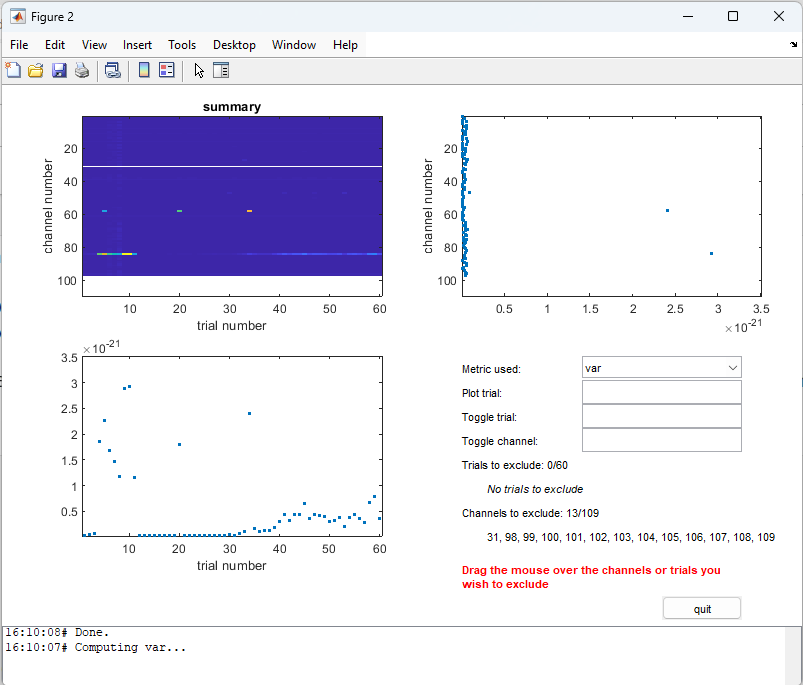

We will now do the same with the HF and WN trials.

In [ ]:
%% Visual Inspection HF


cfg = [];
cfg.method='summary'; % Start first with eliminating trials rather than channels
cfg.channel = {'L*', 'R*'};
 
dataHF_rej = ft_rejectvisual(cfg, dataHF);

save dataHF_rej dataHF_rej

In [ ]:
%% Visual Inspection WN


cfg = [];
cfg.method='summary';
cfg.channel = {'L*', 'R*'};
 
dataWN_rej = ft_rejectvisual(cfg, dataWN);

save dataWN_rej dataWN_rej

Time-lock analysis
------------------
It is known that in an auditory task, we should see the auditory cortex activated 100ms after the audio stimulus has been presented.
In the sequel, we will focus on showing this result.
Start by first computing the averaged Event-Related Fields (ERF) over the trials for each trial type.
The ERF are fluctuations in the magnetic field generated by the brain occuring in response to the stimuli.
This step takes a few minutes to complete.

In [14]:
cd('pipeline/field_trip_pipelines/oddball_pipeline_beamformer')

load dataLF_rej
load dataHF_rej
load dataWN_rej

cfg = [];

avgLF = ft_timelockanalysis(cfg, dataLF_rej);
avgHF = ft_timelockanalysis(cfg, dataHF_rej);
avgWN = ft_timelockanalysis(cfg, dataWN_rej);

save avgLF avgLF
save avgHF avgHF
save avgWN avgWN


load avgLF
load avgHF
load avgWN

the input is raw data with 94 channels and 52 trials
the call to "ft_selectdata" took 0 seconds
the call to "ft_timelockanalysis" took 1 seconds
the input is raw data with 94 channels and 10 trials
the call to "ft_selectdata" took 0 seconds
the call to "ft_timelockanalysis" took 0 seconds
the input is raw data with 94 channels and 10 trials
the call to "ft_selectdata" took 0 seconds
the call to "ft_timelockanalysis" took 0 seconds


In [19]:
We can now plot the averaged trial in sensor space for each type of trials. From the pop-up window, drag a box selection over a number of sensors, then click one of them to see the trial-averaged behavior of the data over time.

Unrecognized function or variable 'We'.

the call to "ft_selectdata" took 0 seconds
reading layout from file fieldlinebeta2bz_helmet.mat
reading 'layout' from file 'fieldlinebeta2bz_helmet.mat'
the call to "ft_prepare_layout" took 0 seconds


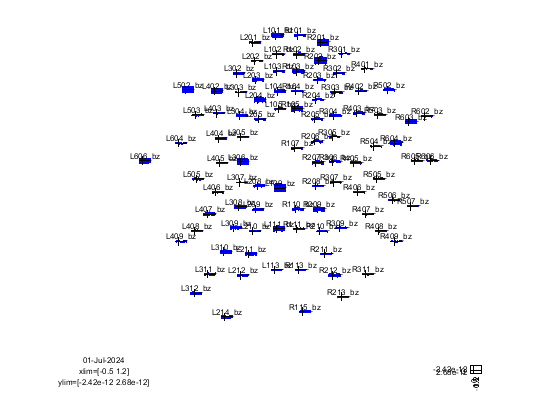

the call to "ft_multiplotER" took 1 seconds


In [15]:
%% Plotting the averaged LF trials

% This will show the average over all trials for each channel for only one
% trigger condition

cfg = [];
cfg.showlabels = 'yes';
cfg.fontsize = 6;
cfg.layout = 'fieldlinebeta2bz_helmet.mat';
% cfg.ylim = [-3e-13 3e-13];
ft_multiplotER(cfg, avgLF);

the call to "ft_selectdata" took 0 seconds
reading layout from file fieldlinebeta2bz_helmet.mat
reading 'layout' from file 'fieldlinebeta2bz_helmet.mat'
the call to "ft_prepare_layout" took 0 seconds


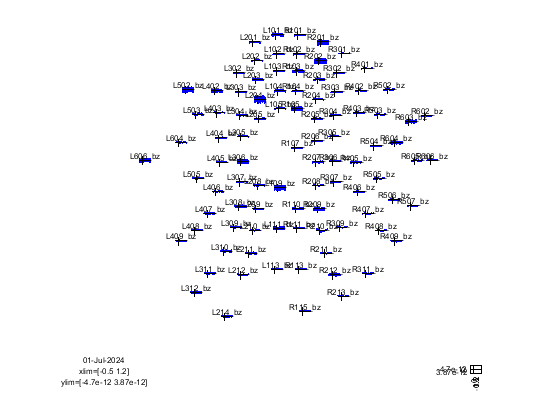

the call to "ft_multiplotER" took 1 seconds


In [16]:
%% Plotting the averaged WN trials

% This will show the average over all trials for each channel for only one
% trigger condition

cfg = [];
cfg.showlabels = 'yes';
cfg.fontsize = 6;
cfg.layout = 'fieldlinebeta2bz_helmet.mat';
% cfg.ylim = [-3e-13 3e-13];
ft_multiplotER(cfg, avgWN);


the call to "ft_selectdata" took 0 seconds
reading layout from file fieldlinebeta2bz_helmet.mat
reading 'layout' from file 'fieldlinebeta2bz_helmet.mat'
the call to "ft_prepare_layout" took 0 seconds


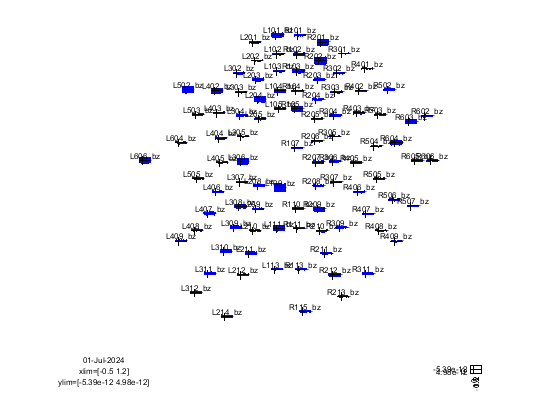

the call to "ft_multiplotER" took 0 seconds


In [17]:
%% Plotting the averaged HF trials

% This will show the average over all trials for each channel for only one
% trigger condition

cfg = [];
cfg.showlabels = 'yes';
cfg.fontsize = 6;
cfg.layout = 'fieldlinebeta2bz_helmet.mat';
% cfg.ylim = [-3e-13 3e-13];
ft_multiplotER(cfg, avgHF);

the input is timelock data with 94 channels and 8500 timebins
applying baseline correction on avg
baseline correction invalidates previous variance estimate, removing var
the call to "ft_timelockbaseline" took 0 seconds
the input is timelock data with 94 channels and 8500 timebins
applying baseline correction on avg
baseline correction invalidates previous variance estimate, removing var
the call to "ft_timelockbaseline" took 0 seconds
the input is timelock data with 94 channels and 8500 timebins
applying baseline correction on avg
baseline correction invalidates previous variance estimate, removing var
the call to "ft_timelockbaseline" took 0 seconds
the call to "ft_selectdata" took 0 seconds
reading layout from file fieldlinebeta2bz_helmet.mat
reading 'layout' from file 'fieldlinebeta2bz_helmet.mat'
the call to "ft_prepare_layout" took 0 seconds


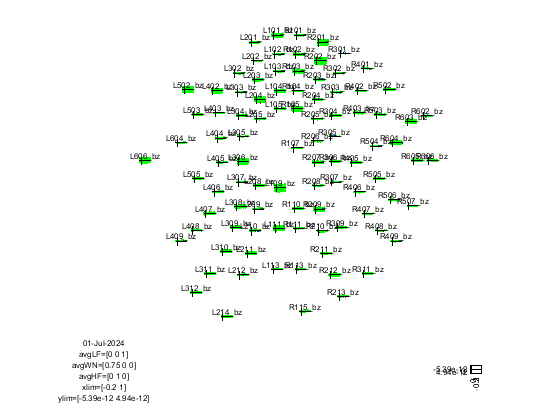

the call to "ft_multiplotER" took 1 seconds


In [18]:
%% Plotting all data

% Same as before but for all the stimulus type

cfg = [];
cfg.showlabels = 'yes';
cfg.fontsize = 6;

%This is saved under Fieldtrip_dir/template/layout
cfg.layout = 'fieldlinebeta2bz_helmet.mat';
cfg.baseline = [-0.2 0];
cfg.xlim = [-0.2 1.0];
% cfg.ylim = [-3e-13 3e-13];
ft_multiplotER(cfg, avgLF, avgWN, avgHF);

In [ ]:
We can also plot the trial & time average in sensor space. the `cfg.xlim` specifies which window of time should we time-average on.
The `0` value corresponds to the stimulus presentation time, so we would choose a 

In [ ]:
%% Plotting in space

% for a single trial type, for each channel, average over time the trial
% and plot the average value on the helmet

% You can still see the time behavior when clicking on one sensor

%LF
cfg = [];
cfg.xlim = [0.05 0.5];
cfg.colorbar = 'yes';
cfg.layout = 'fieldlinebeta2bz_helmet.mat';
ft_topoplotER(cfg, avgLF);


%White Noise

cfg = [];
cfg.xlim = [0.05 0.5];
cfg.colorbar = 'yes';
cfg.layout = 'fieldlinebeta2bz_helmet.mat';
ft_topoplotER(cfg, avgWN);


%High Frequency

cfg = [];
cfg.xlim = [0.05 0.5];
cfg.colorbar = 'yes';
cfg.layout = 'fieldlinebeta2bz_helmet.mat';
ft_topoplotER(cfg, avgHF);


Ways to improve this notebook
-----------------------------
- adapt the filenames of datasets to BIDS
- instead of using `cfg.layout = 'fieldlinebeta2bz_helmet.mat';` we can maybe use the layout given by the .fif?